In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix

## Reading the dataset

In [138]:
df = data = pd.read_csv("letter-recognition.data", header=None)
# set the df names to be correct
"""
     1.	lettr	capital letter	(26 values from A to Z)
	 2.	x-box	horizontal position of box	(integer)
	 3.	y-box	vertical position of box	(integer)
	 4.	width	width of box			(integer)
	 5.	high 	height of box			(integer)
	 6.	onpix	total # on pixels		(integer)
	 7.	x-bar	mean x of on pixels in box	(integer)
	 8.	y-bar	mean y of on pixels in box	(integer)
	 9.	x2bar	mean x variance			(integer)
	10.	y2bar	mean y variance			(integer)
	11.	xybar	mean x y correlation		(integer)
	12.	x2ybr	mean of x * x * y		(integer)
	13.	xy2br	mean of x * y * y		(integer)
	14.	x-ege	mean edge count left to right	(integer)
	15.	xegvy	correlation of x-ege with y	(integer)
	16.	y-ege	mean edge count bottom to top	(integer)
	17.	yegvx	correlation of y-ege with x	(integer)
"""
df = df.rename(columns={0: "letter", 1: "x-box", 2: "y-box", 3: "width", 4: "high", 5: "onpix", 6: "x-bar", 7: "y-bar", 8: "x2bar", 9: "y2bar", 10: "xybar", 11: "x2ybr", 12: "xy2br", 13: "x-ege", 14: "xegvy", 15: "y-ege", 16: "yegvx"})
df


letter  x-box  y-box  width  high  onpix  x-bar  y-bar  x2bar  y2bar  \
0          T      2      8      3     5      1      8     13      0      6   
1          I      5     12      3     7      2     10      5      5      4   
2          D      4     11      6     8      6     10      6      2      6   
3          N      7     11      6     6      3      5      9      4      6   
4          G      2      1      3     1      1      8      6      6      6   
...      ...    ...    ...    ...   ...    ...    ...    ...    ...    ...   
19995      D      2      2      3     3      2      7      7      7      6   
19996      C      7     10      8     8      4      4      8      6      9   
19997      T      6      9      6     7      5      6     11      3      7   
19998      S      2      3      4     2      1      8      7      2      6   
19999      A      4      9      6     6      2      9      5      3      1   

       xybar  x2ybr  xy2br  x-ege  xegvy  y-ege  yegvx  
0          6     10      8      0      8      0      8  
1         13      3      9      2      8      4     10  
2         10      3      7      3      7      3      9  
3          4      4     10      6     10      2      8  
4          6      5      9      1      7      5     10  
...      ...    ...    ...    ...    ...    ...    ...  
19995      6      6      4      2      8      3      7  
19996     12      9     13      2      9      3      7  
19997     11      9      5      2     12      2      4  
19998     10      6      8      1      9      5      8  
19999      8      1      8      2      7      2      8  

[20000 rows x 17 columns]

## Preprocessing

### Checking for null values

In [139]:
# check for null values
df.isnull().sum()

letter    0
x-box     0
y-box     0
width     0
high      0
onpix     0
x-bar     0
y-bar     0
x2bar     0
y2bar     0
xybar     0
x2ybr     0
xy2br     0
x-ege     0
xegvy     0
y-ege     0
yegvx     0
dtype: int64

### Checking for dataset balance

<AxesSubplot:xlabel='letter', ylabel='count'>

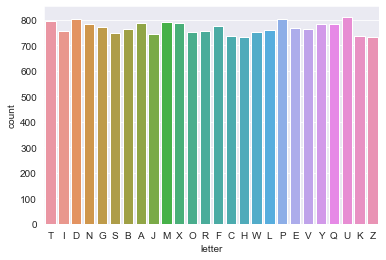

In [140]:
sns.countplot(x='letter', data=df)

Datasetot e balansiran

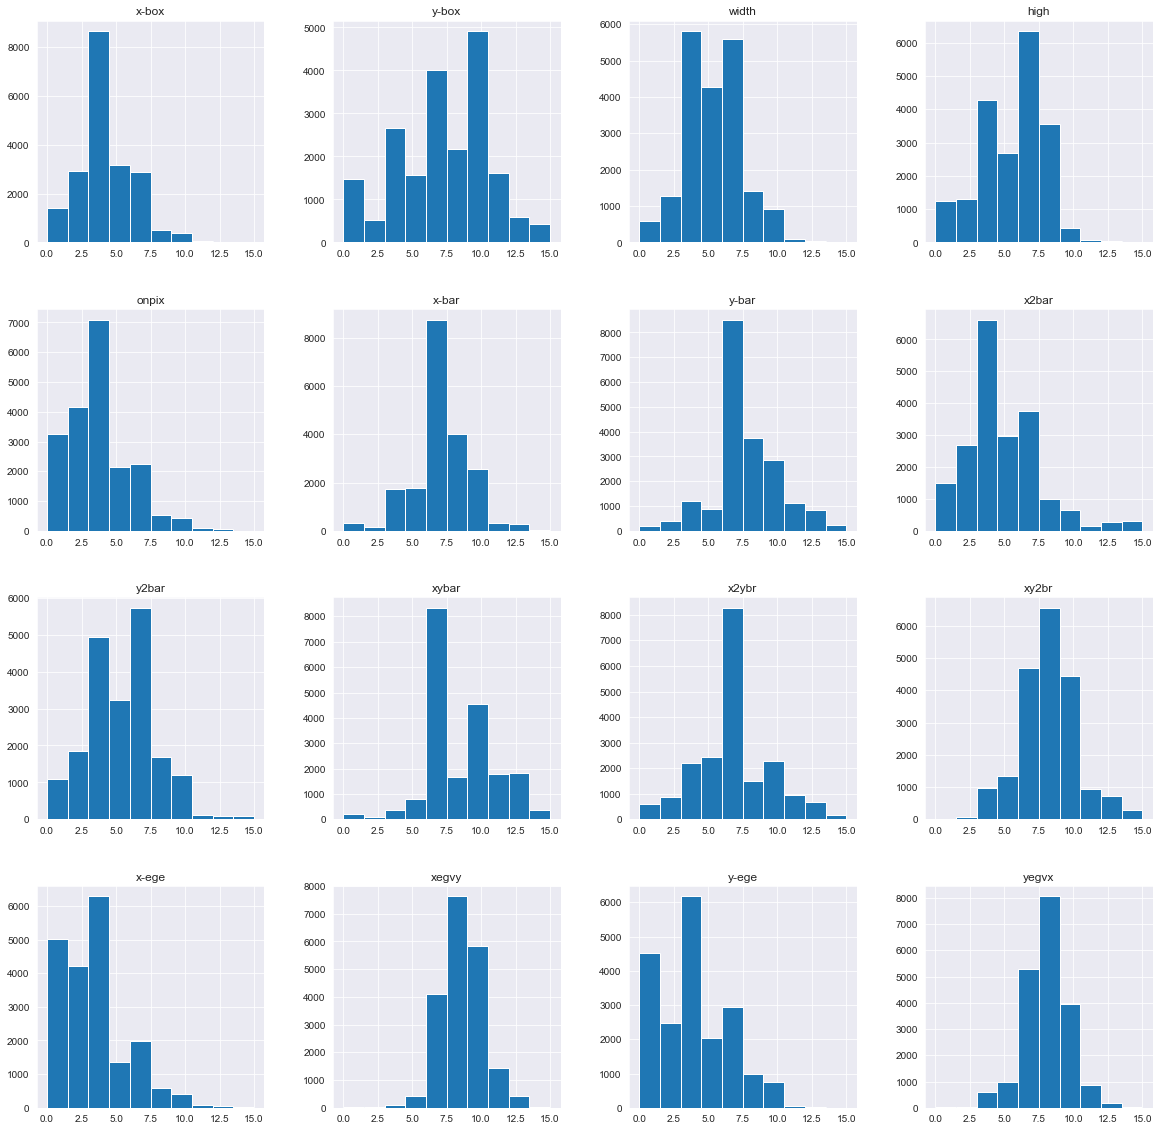

In [141]:
p = df.hist(figsize = (20,20))

### Checking for outliers

In [142]:
df.describe()

x-box         y-box         width         high         onpix  \
count  20000.000000  20000.000000  20000.000000  20000.00000  20000.000000   
mean       4.023550      7.035500      5.121850      5.37245      3.505850   
std        1.913212      3.304555      2.014573      2.26139      2.190458   
min        0.000000      0.000000      0.000000      0.00000      0.000000   
25%        3.000000      5.000000      4.000000      4.00000      2.000000   
50%        4.000000      7.000000      5.000000      6.00000      3.000000   
75%        5.000000      9.000000      6.000000      7.00000      5.000000   
max       15.000000     15.000000     15.000000     15.00000     15.000000   

              x-bar         y-bar         x2bar         y2bar         xybar  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean       6.897600      7.500450      4.628600      5.178650      8.282050   
std        2.026035      2.325354      2.699968      2.380823      2.488475   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.000000      6.000000      3.000000      4.000000      7.000000   
50%        7.000000      7.000000      4.000000      5.000000      8.000000   
75%        8.000000      9.000000      6.000000      7.000000     10.000000   
max       15.000000     15.000000     15.000000     15.000000     15.000000   

             x2ybr         xy2br         x-ege         xegvy         y-ege  \
count  20000.00000  20000.000000  20000.000000  20000.000000  20000.000000   
mean       6.45400      7.929000      3.046100      8.338850      3.691750   
std        2.63107      2.080619      2.332541      1.546722      2.567073   
min        0.00000      0.000000      0.000000      0.000000      0.000000   
25%        5.00000      7.000000      1.000000      8.000000      2.000000   
50%        6.00000      8.000000      3.000000      8.000000      3.000000   
75%        8.00000      9.000000      4.000000      9.000000      5.000000   
max       15.00000     15.000000     15.000000     15.000000     15.000000   

             yegvx  
count  20000.00000  
mean       7.80120  
std        1.61747  
min        0.00000  
25%        7.00000  
50%        8.00000  
75%        9.00000  
max       15.00000

In [143]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['letter'] = le.fit_transform(df['letter'])
X, y = df.drop('letter', axis=1), df['letter']

## Feature selection

In [144]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
sorted(zip(map(lambda x: round(x, 4), clf.feature_importances_), X.columns), reverse=True)

[(0.1052, 'x-ege'),
 (0.0954, 'y-ege'),
 (0.0932, 'y2bar'),
 (0.0906, 'x2bar'),
 (0.0858, 'xy2br'),
 (0.0791, 'x2ybr'),
 (0.0752, 'xybar'),
 (0.0734, 'xegvy'),
 (0.0686, 'y-bar'),
 (0.0546, 'yegvx'),
 (0.0535, 'x-bar'),
 (0.0297, 'onpix'),
 (0.0269, 'width'),
 (0.0242, 'y-box'),
 (0.0231, 'x-box'),
 (0.0215, 'high')]

Kje probam da gi izbrisam kolonite so najmala znacajnost da se sporedi

In [145]:
df_reduced_dim = df.drop(['high', 'x-box', 'width', 'y-box', 'onpix'], axis=1)
X_reduced_dim, y_reduced_dim = df_reduced_dim.drop('letter', axis=1), df_reduced_dim['letter']

## Basis function expansion

In [146]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2, include_bias=False)
X_poly = poly.fit_transform(X)
X_poly

array([[  2.,   8.,   3., ...,   0.,   0.,  64.],
       [  5.,  12.,   3., ...,  16.,  40., 100.],
       [  4.,  11.,   6., ...,   9.,  27.,  81.],
       ...,
       [  6.,   9.,   6., ...,   4.,   8.,  16.],
       [  2.,   3.,   4., ...,  25.,  40.,  64.],
       [  4.,   9.,   6., ...,   4.,  16.,  64.]])

Ovaa ne e dobro poradi faktot shto ima pregolema dimenzoinalnost i nema potreba bash site polinomski kombinacii da se gledaat

In [147]:
df_expanded = df.copy(deep=True)

In [148]:
df_expanded['xy-box'] = df_expanded['x-box'] * df_expanded['y-box']
df_expanded['width-high'] = df_expanded['width'] * df_expanded['high']

<AxesSubplot:xlabel='letter'>

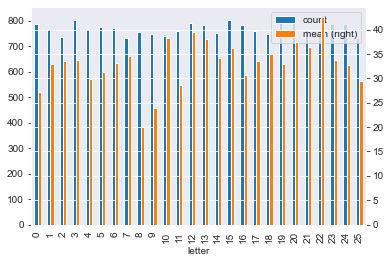

In [149]:
df_expanded.groupby('letter')['xy-box'].agg(['count', 'mean']).plot(kind='bar', secondary_y='mean')

In [150]:
def plot_col_mean_vs_target(df, col_name):
    grouped_data = df.groupby('letter')[col_name].agg(['count', 'mean'])

    # Create the plot with increased figure size
    fig, ax = plt.subplots(figsize=(20, 17))  # Set the desired figsize

    # Plot the bar chart with secondary y-axis
    grouped_data.plot(kind='bar', ax=ax, secondary_y='mean')

    # Customize the plot as needed
    ax.set_ylabel('Count')  # Set y-axis label for the count
    ax.right_ax.set_ylabel('Mean')  # Set y-axis label for the mean
    ax.set_xlabel('Letter')  # Set x-axis label
    ax.set_title('Count and Mean of xy-box by Letter')  # Set plot title

    # Show the plot
    plt.show()

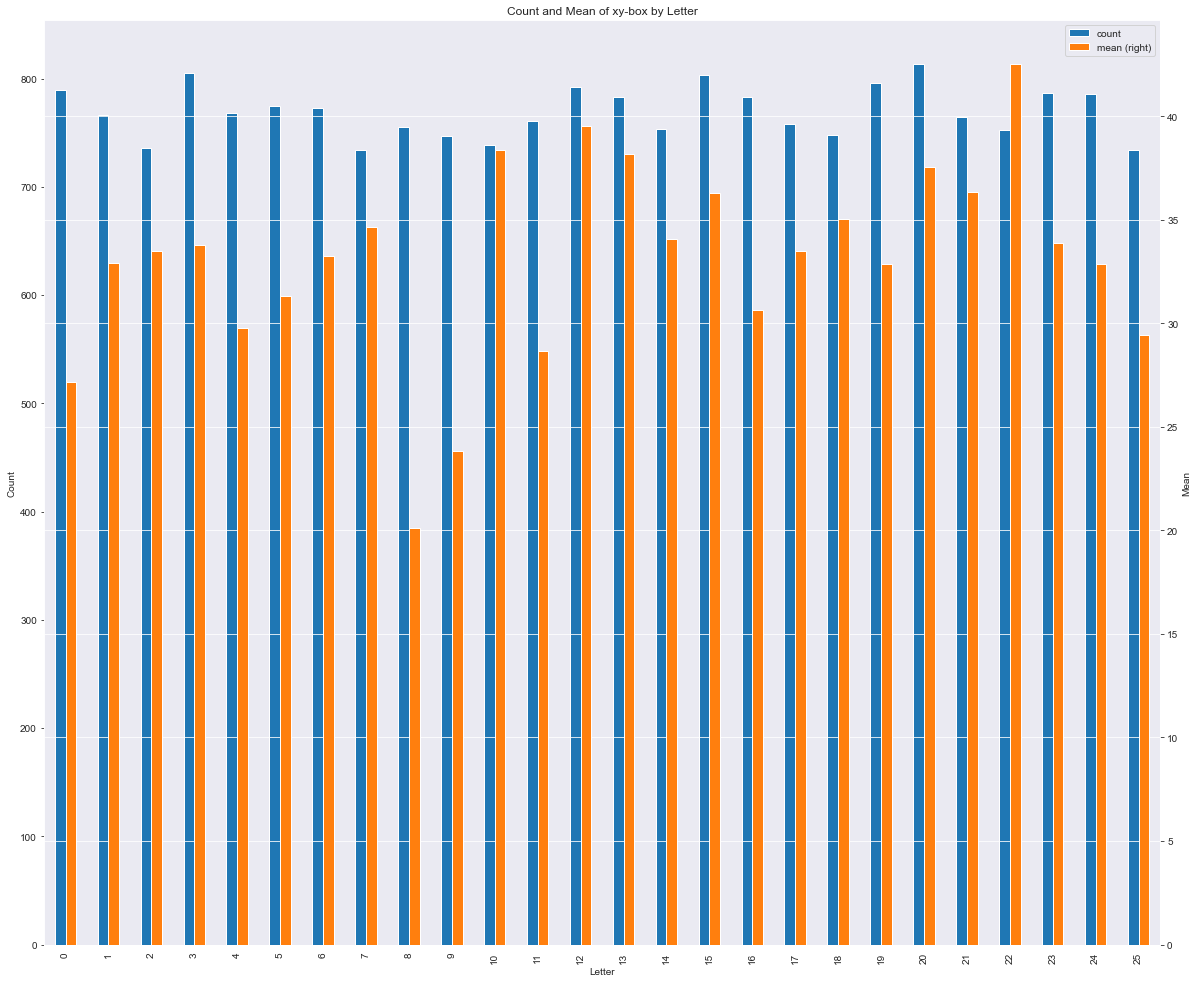

In [151]:
plot_col_mean_vs_target(df_expanded, 'xy-box')

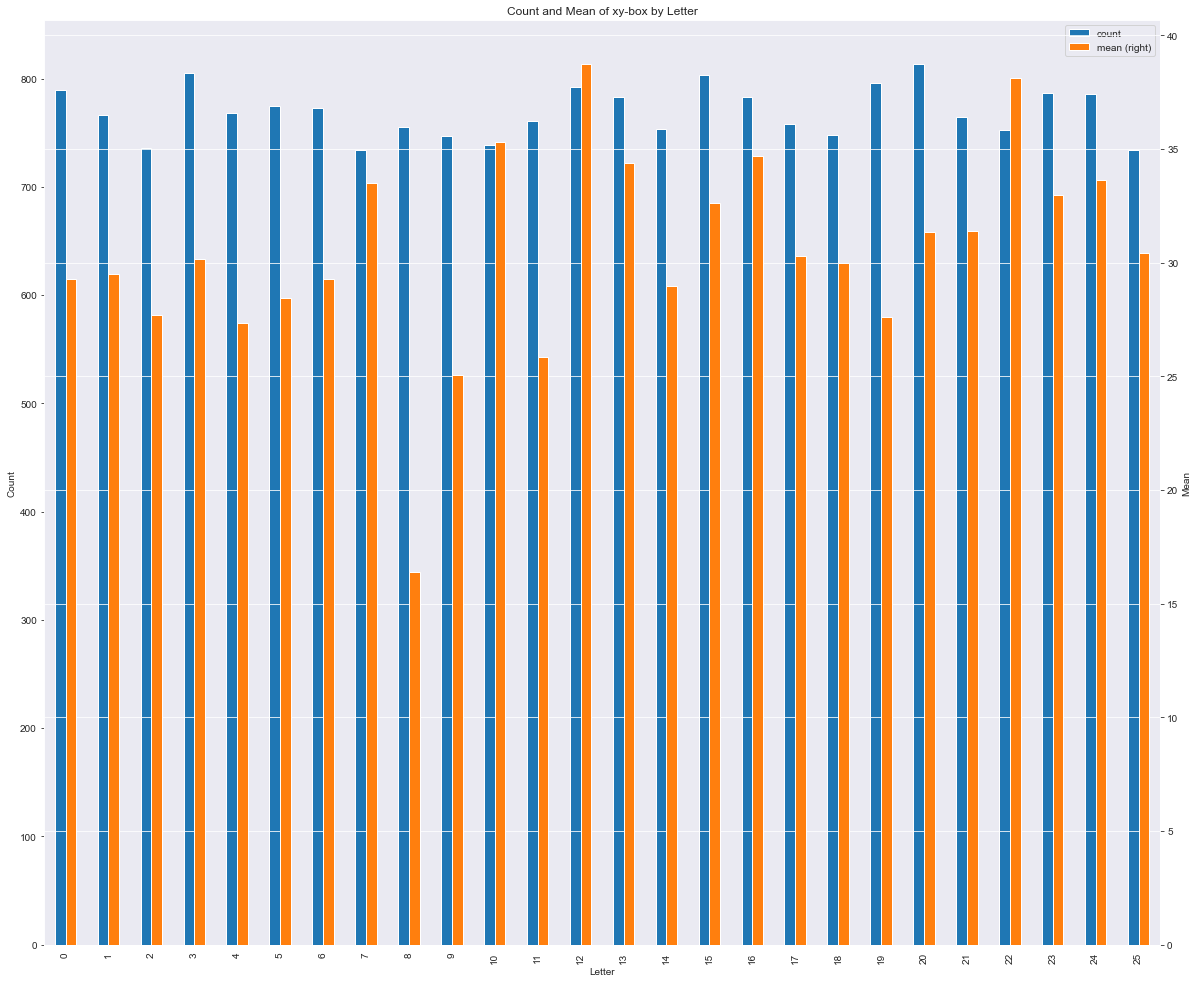

In [152]:
plot_col_mean_vs_target(df_expanded, 'width-high')

In [153]:
X_expanded, y_expanded = df_expanded.drop('letter', axis=1), df_expanded['letter']

In [154]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X_expanded, y_expanded)
sorted(zip(map(lambda x: round(x, 4), clf.feature_importances_), X_expanded.columns), reverse=True)

[(0.0991, 'x-ege'),
 (0.0971, 'y-ege'),
 (0.0886, 'y2bar'),
 (0.0852, 'x2bar'),
 (0.0827, 'xy2br'),
 (0.0786, 'x2ybr'),
 (0.072, 'xybar'),
 (0.0688, 'y-bar'),
 (0.0687, 'xegvy'),
 (0.0549, 'x-bar'),
 (0.0538, 'yegvx'),
 (0.0286, 'onpix'),
 (0.0239, 'width'),
 (0.0214, 'y-box'),
 (0.0207, 'x-box'),
 (0.0202, 'xy-box'),
 (0.0188, 'high'),
 (0.0168, 'width-high')]

In [155]:
df_expanded

letter  x-box  y-box  width  high  onpix  x-bar  y-bar  x2bar  y2bar  \
0          19      2      8      3     5      1      8     13      0      6   
1           8      5     12      3     7      2     10      5      5      4   
2           3      4     11      6     8      6     10      6      2      6   
3          13      7     11      6     6      3      5      9      4      6   
4           6      2      1      3     1      1      8      6      6      6   
...       ...    ...    ...    ...   ...    ...    ...    ...    ...    ...   
19995       3      2      2      3     3      2      7      7      7      6   
19996       2      7     10      8     8      4      4      8      6      9   
19997      19      6      9      6     7      5      6     11      3      7   
19998      18      2      3      4     2      1      8      7      2      6   
19999       0      4      9      6     6      2      9      5      3      1   

       xybar  x2ybr  xy2br  x-ege  xegvy  y-ege  yegvx  xy-box  width-high  
0          6     10      8      0      8      0      8      16          15  
1         13      3      9      2      8      4     10      60          21  
2         10      3      7      3      7      3      9      44          48  
3          4      4     10      6     10      2      8      77          36  
4          6      5      9      1      7      5     10       2           3  
...      ...    ...    ...    ...    ...    ...    ...     ...         ...  
19995      6      6      4      2      8      3      7       4           9  
19996     12      9     13      2      9      3      7      70          64  
19997     11      9      5      2     12      2      4      54          42  
19998     10      6      8      1      9      5      8       6           8  
19999      8      1      8      2      7      2      8      36          36  

[20000 rows x 19 columns]

In [156]:
# check for mutual information with the new features
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_expanded[['xy-box', 'width-high']], y_expanded)
mutual_info

array([0.01625437, 0.03219313])

In [157]:
mutual_info = mutual_info_classif(X, y)
mutual_info

array([0.05871477, 0.00399882, 0.09044069, 0.02480461, 0.06705146,
       0.27440157, 0.45080819, 0.31081573, 0.38057264, 0.26442752,
       0.51284462, 0.4358717 , 0.4068661 , 0.46728081, 0.37831139,
       0.23355481])

Spored razni metriki ovie dve novi koloni ne se dovolno dobri za da se koristat

## Visualization

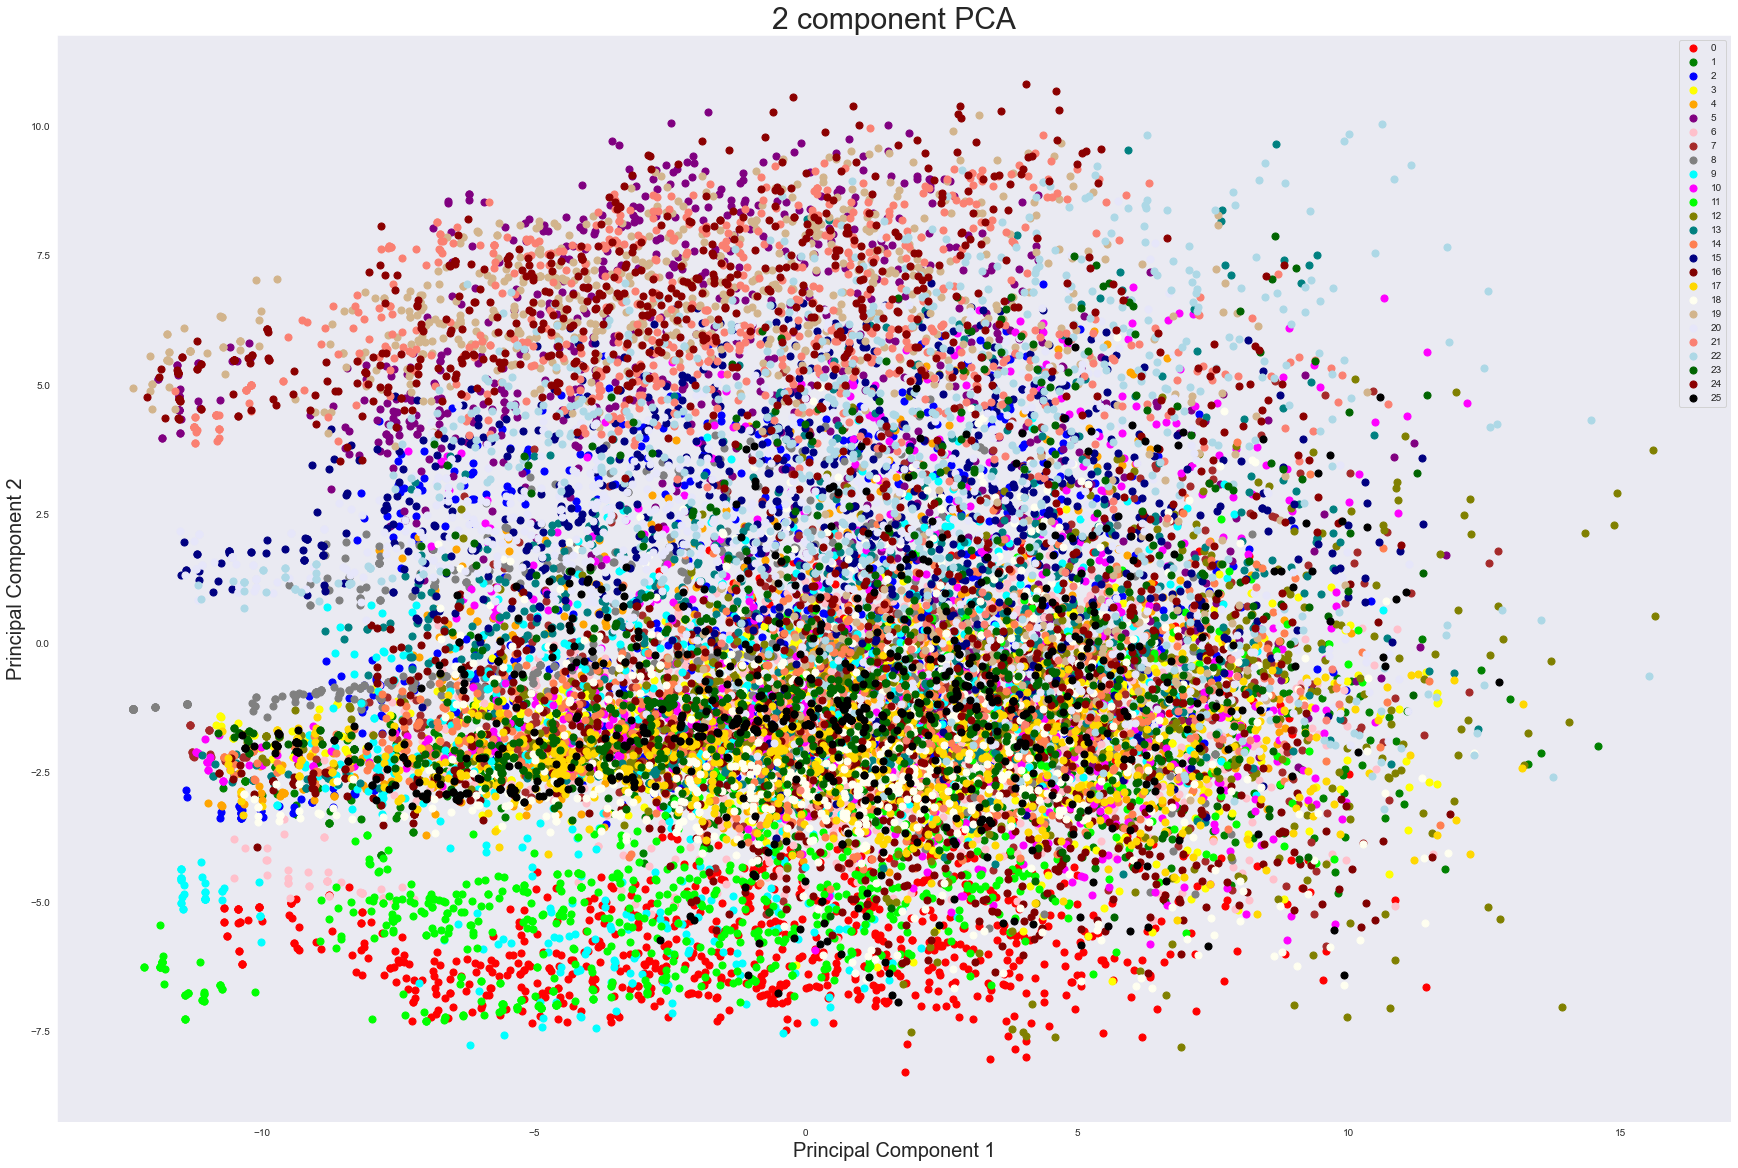

In [158]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principal_components = pca.fit_transform(X)

principalDf = pd.DataFrame(data=principal_components
                           , columns=['principal component 1', 'principal component 2'])

final_df = pd.concat([principalDf, y], axis=1, join='outer')
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=20)
ax.set_ylabel('Principal Component 2', fontsize=20)
ax.set_title('2 component PCA', fontsize=30)

targets = [i for i in range(26)]
# generate a list with 24 colors
colors = ("red", "green", "blue", "yellow", "orange", "purple", "pink", "brown", "gray", "cyan", "magenta", "lime", "olive", "teal", "coral", "navy", "maroon", "gold", "ivory", "tan", "lavender", "salmon", "lightblue", "darkgreen", "darkred", "black")
for target, color in zip(targets, colors):
    indicesToKeep = final_df['letter'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               , final_df.loc[indicesToKeep, 'principal component 2']
               , c=color
               , s=50)
# make the plot bigger
# fig.set_size_inches(30, 20)
ax.legend(targets)
ax.grid()

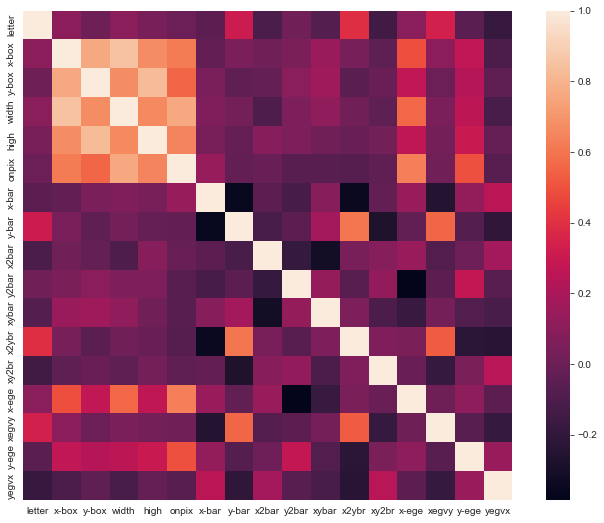

In [159]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

In [160]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0, perplexity=50, n_iter=1000, learning_rate=200)
df_tsne = tsne.fit_transform(df)


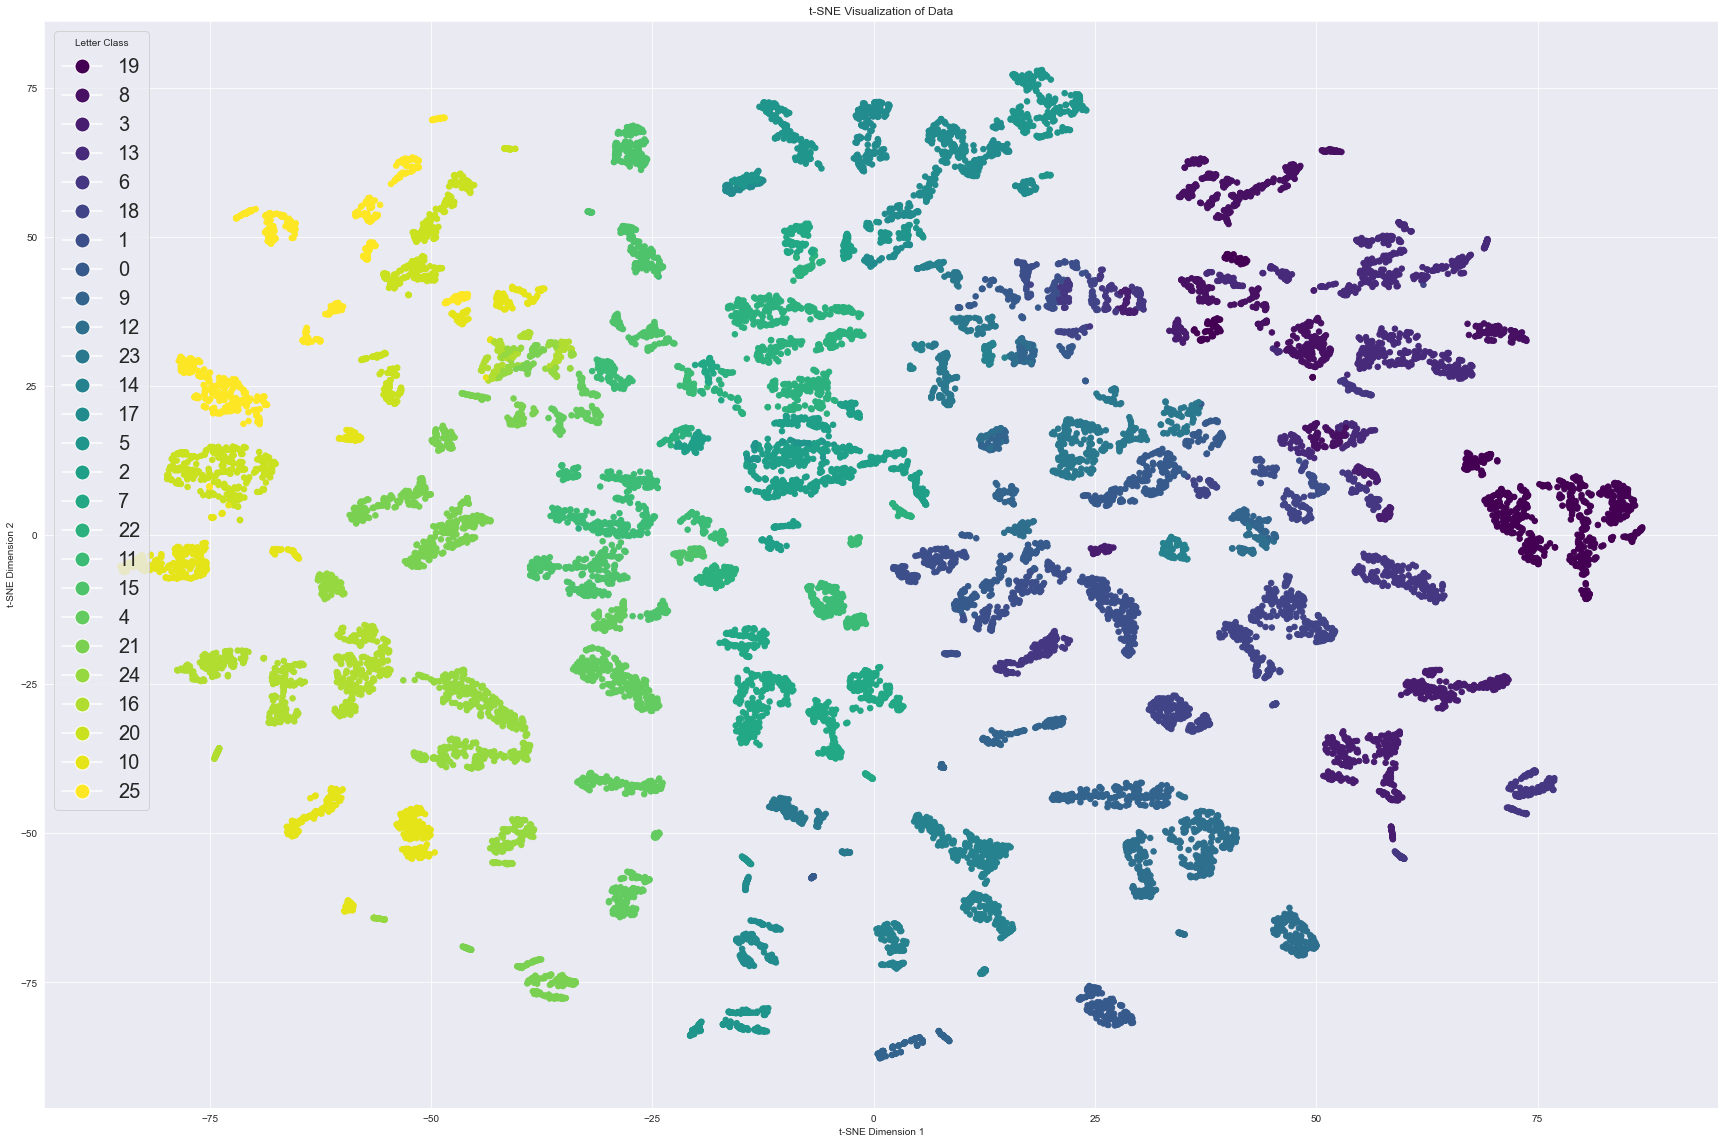

In [161]:
from matplotlib.lines import Line2D

plt.figure(figsize=(30, 20))
scatter = plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=df['letter'], s=30, cmap='viridis')
# Get unique letter classes and their corresponding colors from the scatter plot
unique_letters = df['letter'].unique()
colors = scatter.to_rgba(range(len(unique_letters)))

# Create custom legend handles for each letter class
legend_handles = [Line2D([], [], marker='o', color='w', markerfacecolor=color, markersize=15) for color in colors]

# Create the legend with letter class labels
legend = plt.legend(legend_handles, unique_letters, title='Letter Class', fontsize=20)
# plt.legend(legend_handles, unique_letters, title='Letter Class')

# Add labels and title to the plot
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of Data')

# Display the plot with the legend
plt.show()

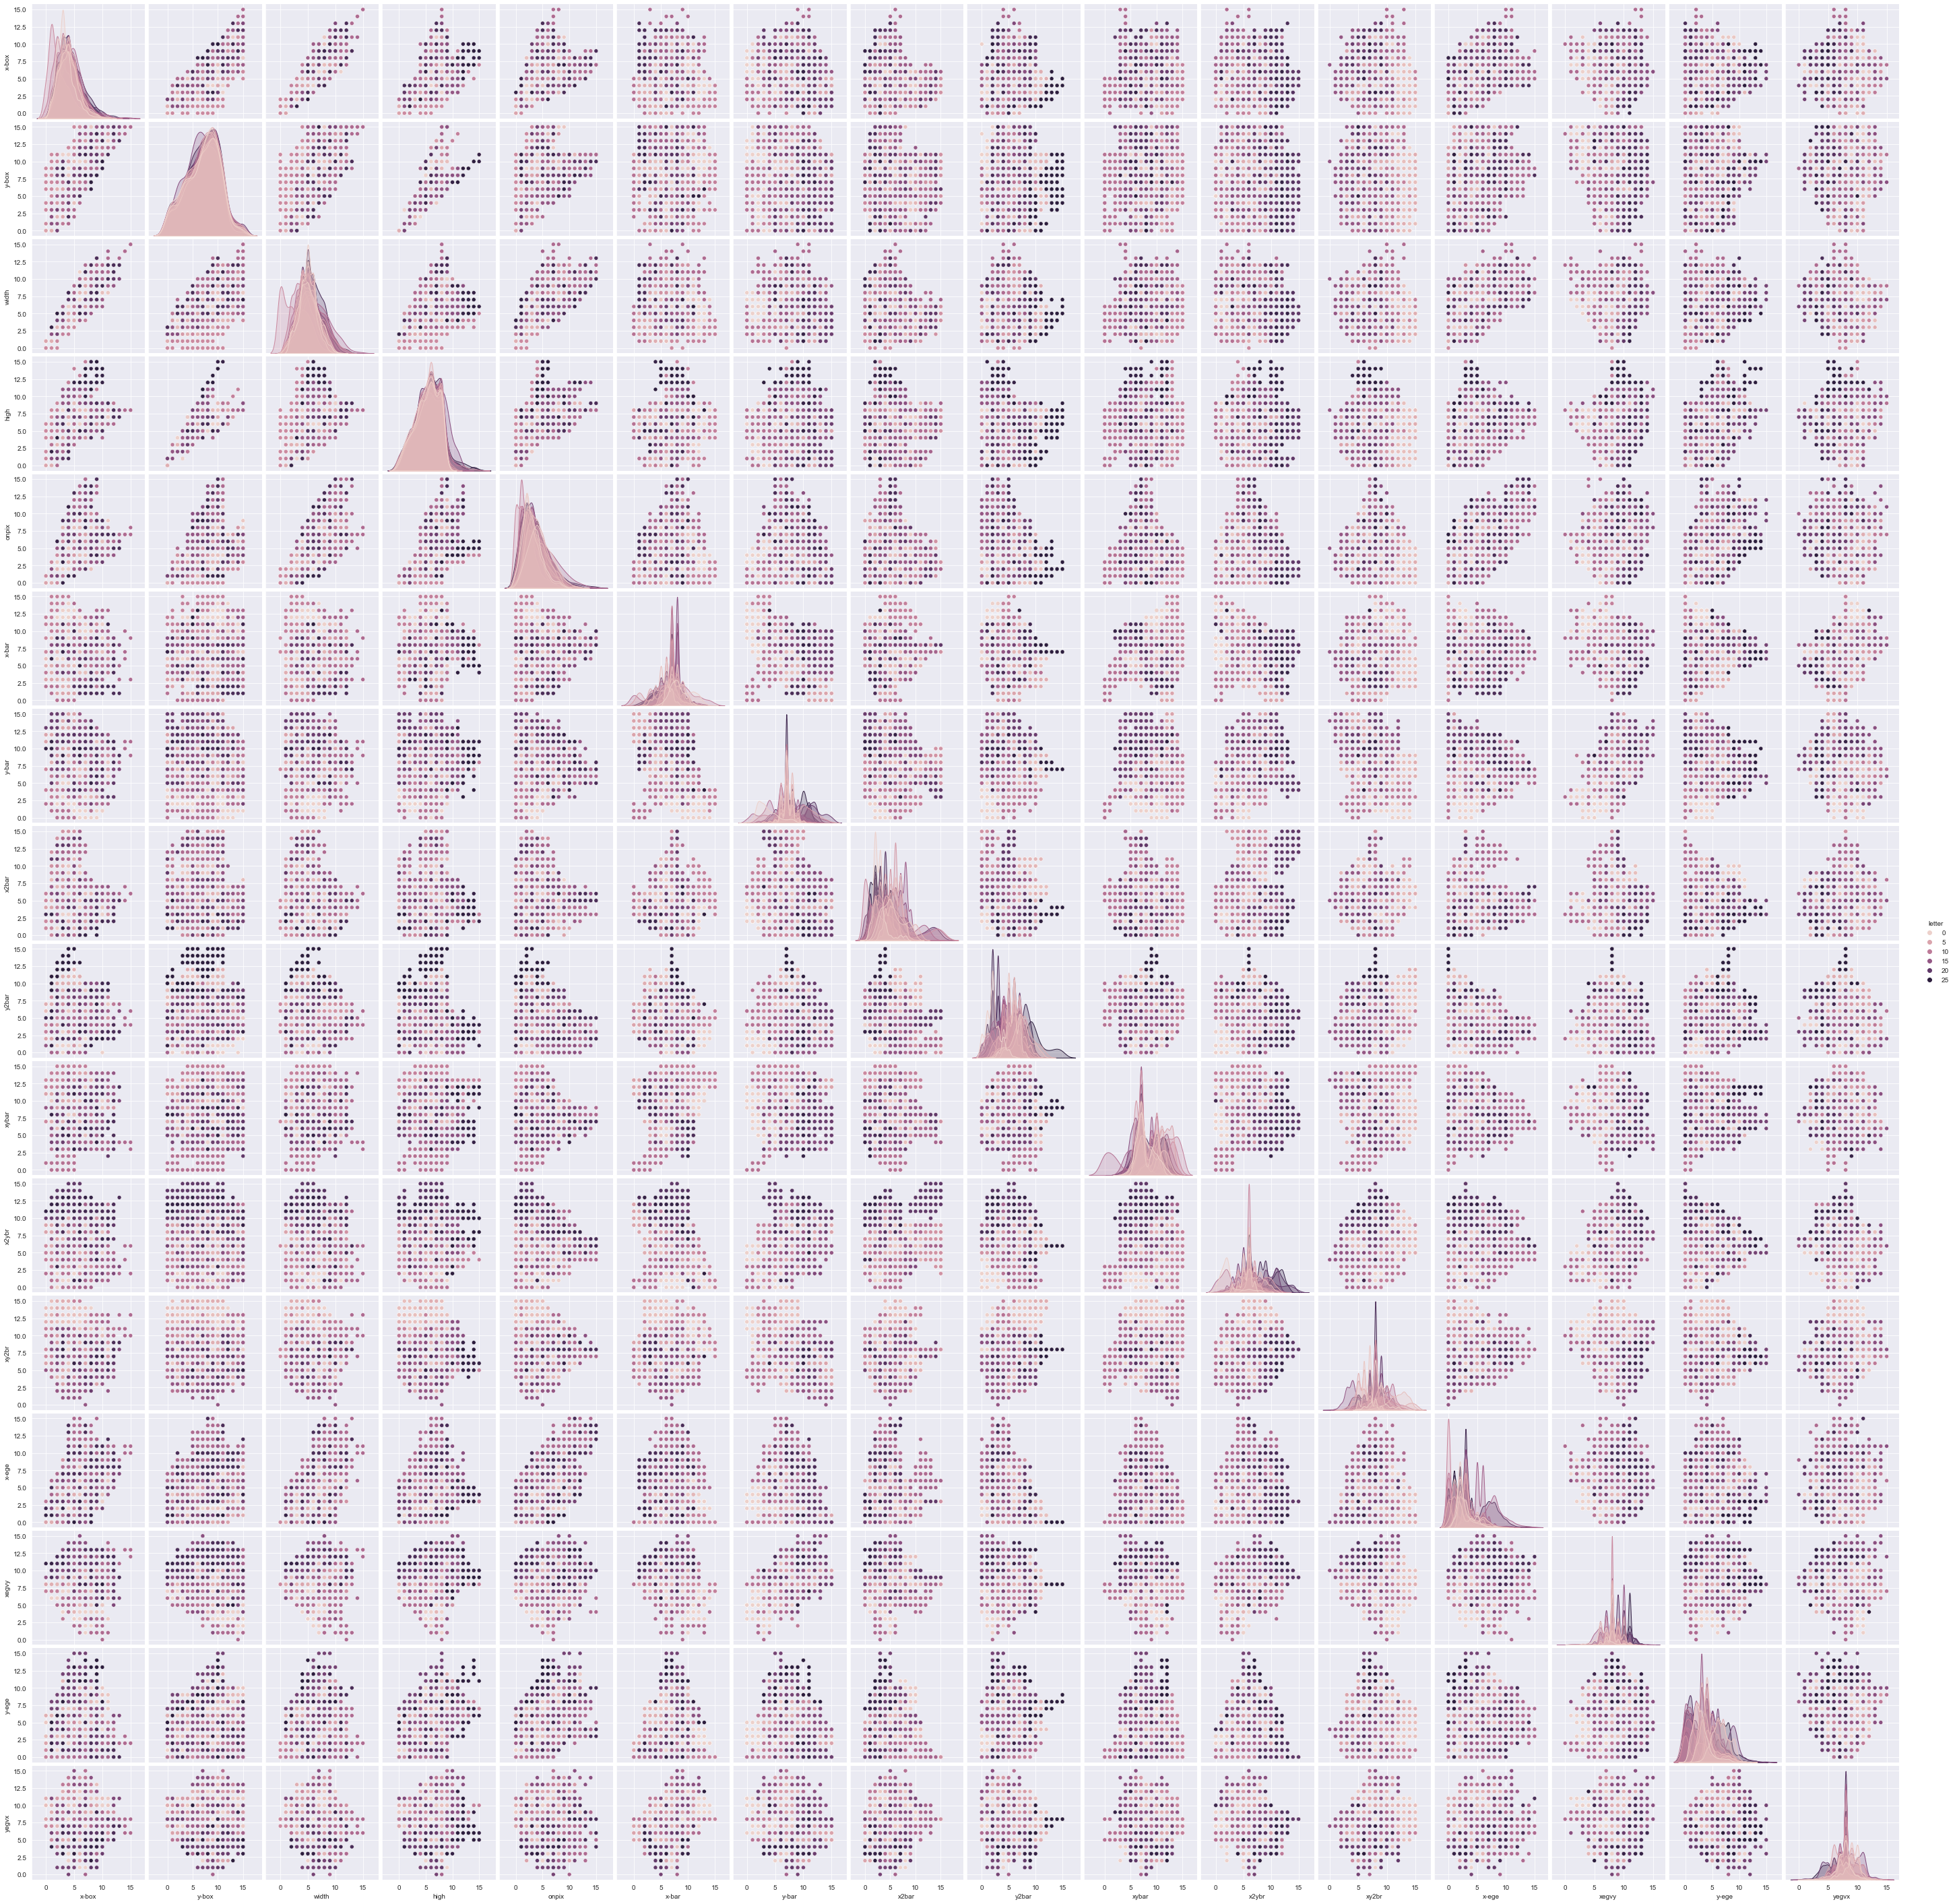

In [162]:
sns.pairplot(df, hue='letter', height=2.5)

## Models and model evaluation

In [163]:
from sklearn.model_selection import train_test_split


def split_data(X, y, test_size=0.2):
    return train_test_split(X, y, test_size=test_size, random_state=42)

In [164]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, precision_score, f1_score


def run_model(model, X, y, report=False, display_matrx=False):
    X_train, X_test, y_train, y_test = split_data(X, y)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    if report:
        print(classification_report(y_test, y_pred))
    if display_matrx:
        cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix as heatmap
        plt.figure(figsize=(8, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

        # Add labels, title, and axis ticks
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix')
    acc = accuracy_score(y_test, y_pred)
    report_text = f"""
    Accuracy: {acc}
    Recall: {recall_score(y_test, y_pred, average='macro')}
    Precision: {precision_score(y_test, y_pred, average='macro')}
    F1: {f1_score(y_test, y_pred, average='macro')}
    """
    print(report_text)
    return acc

In [165]:
from sklearn.model_selection import cross_validate
def run_cross_validation(model, X, y, cv=5):
    scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
    scores = cross_validate(model, X, y, cv=cv, scoring=scoring, return_train_score=True)
    df = pd.DataFrame(scores)
    df = df.drop(['fit_time', 'score_time'], axis=1)
    df.loc["Mean"] = df.mean()
    return df

In [166]:
accuracies = dict()

### Naive Bayes

In [167]:
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
accuracies['Naive Bayes'] = run_model(naive, X, y, report=True, display_matrx=False)

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       149
           1       0.51      0.69      0.59       153
           2       0.70      0.70      0.70       137
           3       0.60      0.78      0.68       156
           4       0.62      0.40      0.48       141
           5       0.65      0.74      0.69       140
           6       0.55      0.54      0.55       160
           7       0.51      0.31      0.39       144
           8       0.56      0.77      0.65       146
           9       0.84      0.74      0.79       149
          10       0.49      0.45      0.47       130
          11       0.99      0.76      0.86       155
          12       0.70      0.90      0.79       168
          13       0.89      0.67      0.77       151
          14       0.48      0.74      0.58       145
          15       0.89      0.73      0.80       173
          16       0.63      0.55      0.59       166
          17       0.56    

In [168]:
run_model(naive, X_expanded, y_expanded, report=True, display_matrx=False)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       149
           1       0.52      0.66      0.58       153
           2       0.68      0.69      0.69       137
           3       0.58      0.73      0.65       156
           4       0.62      0.43      0.51       141
           5       0.65      0.72      0.68       140
           6       0.53      0.49      0.51       160
           7       0.52      0.30      0.38       144
           8       0.44      0.76      0.56       146
           9       0.83      0.74      0.79       149
          10       0.42      0.42      0.42       130
          11       0.99      0.77      0.87       155
          12       0.66      0.88      0.75       168
          13       0.82      0.65      0.72       151
          14       0.50      0.72      0.59       145
          15       0.86      0.72      0.79       173
          16       0.62      0.55      0.58       166
          17       0.56    

0.62625

In [169]:
run_model(naive, X_reduced_dim, y_reduced_dim, report=True, display_matrx=False)

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       149
           1       0.51      0.73      0.60       153
           2       0.73      0.71      0.72       137
           3       0.60      0.78      0.68       156
           4       0.64      0.39      0.48       141
           5       0.60      0.73      0.66       140
           6       0.53      0.59      0.56       160
           7       0.49      0.30      0.37       144
           8       0.70      0.78      0.74       146
           9       0.81      0.73      0.77       149
          10       0.54      0.45      0.49       130
          11       0.95      0.77      0.85       155
          12       0.79      0.90      0.84       168
          13       0.89      0.64      0.75       151
          14       0.52      0.75      0.61       145
          15       0.91      0.77      0.83       173
          16       0.60      0.54      0.57       166
          17       0.59    

0.66475

In [170]:
run_cross_validation(naive, X, y)

test_accuracy  train_accuracy  test_precision_macro  \
0           0.64475        0.650062              0.655875   
1           0.65275        0.646813              0.665514   
2           0.63350        0.648125              0.647309   
3           0.65575        0.640062              0.668011   
4           0.62725        0.651500              0.643698   
Mean        0.64280        0.647312              0.656081   

      train_precision_macro  test_recall_macro  train_recall_macro  \
0                  0.662023           0.643593            0.648733   
1                  0.660516           0.651420            0.645494   
2                  0.660852           0.632139            0.646886   
3                  0.651831           0.654421            0.638877   
4                  0.663962           0.626068            0.650173   
Mean               0.659837           0.641528            0.646032   

      test_f1_macro  train_f1_macro  
0          0.640502        0.646350  
1          0.647650        0.642705  
2          0.629857        0.644091  
3          0.650270        0.635132  
4          0.623347        0.646999  
Mean       0.638325        0.643056

In [171]:
run_cross_validation(naive, X_expanded, y_expanded)

test_accuracy  train_accuracy  test_precision_macro  \
0           0.62650        0.633437              0.639534   
1           0.63175        0.625875              0.647400   
2           0.61750        0.631500              0.635323   
3           0.64150        0.624875              0.654595   
4           0.60875        0.633375              0.629305   
Mean        0.62520        0.629812              0.641231   

      train_precision_macro  test_recall_macro  train_recall_macro  \
0                  0.648168           0.625381            0.632172   
1                  0.643245           0.630520            0.624650   
2                  0.647327           0.616303            0.630254   
3                  0.640229           0.640181            0.623670   
4                  0.648050           0.607612            0.632221   
Mean               0.645404           0.623999            0.628593   

      test_f1_macro  train_f1_macro  
0          0.622769        0.630539  
1          0.627080        0.623105  
2          0.615344        0.628647  
3          0.636608        0.621046  
4          0.606734        0.629705  
Mean       0.621707        0.626608

In [172]:
run_cross_validation(naive, X_reduced_dim, y_reduced_dim)

test_accuracy  train_accuracy  test_precision_macro  \
0           0.65750        0.667750              0.667132   
1           0.66675        0.664062              0.677923   
2           0.65075        0.666438              0.660437   
3           0.67650        0.651375              0.686590   
4           0.65250        0.667500              0.666245   
Mean        0.66080        0.663425              0.671665   

      train_precision_macro  test_recall_macro  train_recall_macro  \
0                  0.677897           0.656340            0.666368   
1                  0.674974           0.665568            0.662763   
2                  0.676141           0.649341            0.665169   
3                  0.662811           0.675117            0.650259   
4                  0.678424           0.651323            0.666186   
Mean               0.674049           0.659538            0.662149   

      test_f1_macro  train_f1_macro  
0          0.653153        0.663494  
1          0.661684        0.659281  
2          0.645973        0.661482  
3          0.671883        0.646859  
4          0.647737        0.663362  
Mean       0.656086        0.658896

### LDA

In [173]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
accuracies['LDA'] = run_model(lda, X, y, report=True, display_matrx=False)

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       149
           1       0.54      0.72      0.62       153
           2       0.62      0.70      0.66       137
           3       0.67      0.81      0.73       156
           4       0.69      0.42      0.52       141
           5       0.59      0.71      0.64       140
           6       0.56      0.56      0.56       160
           7       0.47      0.42      0.44       144
           8       0.82      0.82      0.82       146
           9       0.81      0.70      0.75       149
          10       0.58      0.65      0.61       130
          11       0.97      0.73      0.83       155
          12       0.88      0.89      0.89       168
          13       0.79      0.80      0.79       151
          14       0.62      0.70      0.66       145
          15       0.86      0.75      0.80       173
          16       0.68      0.63      0.65       166
          17       0.64    

In [174]:
run_model(lda, X_expanded, y_expanded, report=True, display_matrx=False)

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       149
           1       0.56      0.73      0.63       153
           2       0.62      0.70      0.66       137
           3       0.66      0.79      0.72       156
           4       0.69      0.42      0.52       141
           5       0.59      0.68      0.63       140
           6       0.53      0.54      0.54       160
           7       0.48      0.44      0.46       144
           8       0.82      0.81      0.81       146
           9       0.80      0.70      0.75       149
          10       0.60      0.66      0.63       130
          11       0.97      0.73      0.83       155
          12       0.88      0.89      0.88       168
          13       0.80      0.80      0.80       151
          14       0.61      0.69      0.65       145
          15       0.85      0.76      0.80       173
          16       0.66      0.62      0.64       166
          17       0.66    

0.71

In [175]:
run_model(lda, X_reduced_dim, y_reduced_dim, report=True, display_matrx=False)

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       149
           1       0.47      0.71      0.56       153
           2       0.61      0.71      0.65       137
           3       0.64      0.80      0.71       156
           4       0.51      0.26      0.35       141
           5       0.55      0.69      0.62       140
           6       0.57      0.49      0.52       160
           7       0.41      0.20      0.27       144
           8       0.75      0.82      0.78       146
           9       0.84      0.72      0.77       149
          10       0.57      0.63      0.60       130
          11       0.95      0.72      0.82       155
          12       0.87      0.89      0.88       168
          13       0.72      0.78      0.75       151
          14       0.57      0.68      0.62       145
          15       0.85      0.75      0.80       173
          16       0.62      0.58      0.60       166
          17       0.62    

0.674

In [176]:
run_cross_validation(lda, X, y)

test_accuracy  train_accuracy  test_precision_macro  \
0           0.70425        0.703438              0.716802   
1           0.71100        0.705063              0.721865   
2           0.69800        0.707625              0.713006   
3           0.70800        0.703313              0.715582   
4           0.69225        0.705000              0.706363   
Mean        0.70270        0.704888              0.714724   

      train_precision_macro  test_recall_macro  train_recall_macro  \
0                  0.713692           0.703407            0.702323   
1                  0.715834           0.709956            0.704087   
2                  0.718506           0.696917            0.706635   
3                  0.715014           0.706674            0.702315   
4                  0.716176           0.691283            0.703904   
Mean               0.715845           0.701647            0.703853   

      test_f1_macro  train_f1_macro  
0          0.703855        0.703103  
1          0.711544        0.705014  
2          0.699304        0.707536  
3          0.706618        0.703668  
4          0.691961        0.704864  
Mean       0.702656        0.704837

In [177]:
run_cross_validation(lda, X_expanded, y_expanded)

test_accuracy  train_accuracy  test_precision_macro  \
0           0.70850        0.706250              0.721550   
1           0.71200        0.707688              0.722373   
2           0.69975        0.711375              0.713969   
3           0.71075        0.706875              0.718038   
4           0.69500        0.710000              0.710244   
Mean        0.70520        0.708438              0.717235   

      train_precision_macro  test_recall_macro  train_recall_macro  \
0                  0.716579           0.707638            0.705155   
1                  0.718762           0.711064            0.706731   
2                  0.721868           0.698725            0.710379   
3                  0.718701           0.709423            0.705930   
4                  0.721166           0.693981            0.709018   
Mean               0.719415           0.704166            0.707442   

      test_f1_macro  train_f1_macro  
0          0.708770        0.706413  
1          0.712693        0.708152  
2          0.701424        0.711486  
3          0.709633        0.707696  
4          0.695273        0.710496  
Mean       0.705559        0.708848

In [178]:
run_cross_validation(lda, X_reduced_dim, y_reduced_dim)

test_accuracy  train_accuracy  test_precision_macro  \
0           0.66050        0.667562              0.663578   
1           0.67750        0.668063              0.682860   
2           0.66100        0.670813              0.671049   
3           0.67800        0.666937              0.677465   
4           0.65475        0.671562              0.663079   
Mean        0.66635        0.668987              0.671606   

      train_precision_macro  test_recall_macro  train_recall_macro  \
0                  0.672402           0.659534            0.666284   
1                  0.673359           0.676365            0.666874   
2                  0.674804           0.659526            0.669614   
3                  0.673145           0.676466            0.665773   
4                  0.676616           0.653750            0.670338   
Mean               0.674065           0.665128            0.667776   

      test_f1_macro  train_f1_macro  
0          0.654195        0.662325  
1          0.673230        0.663443  
2          0.656989        0.665744  
3          0.670889        0.662553  
4          0.650154        0.666790  
Mean       0.661091        0.664171

### QDA

In [179]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
run_model(qda, X, y, report=True, display_matrx=False)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       149
           1       0.84      0.90      0.87       153
           2       0.90      0.86      0.88       137
           3       0.83      0.93      0.88       156
           4       0.92      0.84      0.88       141
           5       0.85      0.89      0.87       140
           6       0.82      0.85      0.83       160
           7       0.84      0.64      0.73       144
           8       0.95      0.85      0.90       146
           9       0.95      0.91      0.93       149
          10       0.76      0.82      0.79       130
          11       0.93      0.91      0.92       155
          12       0.91      0.96      0.93       168
          13       0.99      0.87      0.93       151
          14       0.80      0.88      0.84       145
          15       0.95      0.92      0.93       173
          16       0.90      0.90      0.90       166
          17       0.77    

0.88575

In [180]:
accuracies['QDA'] = run_model(qda, X_expanded, y_expanded, report=True, display_matrx=False)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       149
           1       0.85      0.88      0.87       153
           2       0.91      0.85      0.88       137
           3       0.83      0.92      0.88       156
           4       0.91      0.84      0.87       141
           5       0.82      0.89      0.85       140
           6       0.81      0.88      0.84       160
           7       0.85      0.67      0.75       144
           8       0.95      0.84      0.89       146
           9       0.94      0.90      0.92       149
          10       0.77      0.81      0.79       130
          11       0.95      0.90      0.92       155
          12       0.90      0.96      0.93       168
          13       0.99      0.87      0.93       151
          14       0.79      0.84      0.82       145
          15       0.93      0.88      0.91       173
          16       0.89      0.89      0.89       166
          17       0.76    

In [181]:
run_model(qda, X_reduced_dim, y_reduced_dim, report=True, display_matrx=False)

              precision    recall  f1-score   support

           0       0.90      0.95      0.93       149
           1       0.77      0.81      0.79       153
           2       0.85      0.77      0.80       137
           3       0.75      0.90      0.82       156
           4       0.80      0.81      0.81       141
           5       0.82      0.85      0.83       140
           6       0.78      0.78      0.78       160
           7       0.72      0.38      0.49       144
           8       0.88      0.80      0.84       146
           9       0.95      0.85      0.90       149
          10       0.75      0.68      0.71       130
          11       0.94      0.90      0.92       155
          12       0.90      0.94      0.92       168
          13       0.95      0.84      0.89       151
          14       0.77      0.86      0.81       145
          15       0.91      0.86      0.89       173
          16       0.79      0.82      0.80       166
          17       0.72    

0.83025

In [182]:
run_cross_validation(qda, X, y)

test_accuracy  train_accuracy  test_precision_macro  \
0           0.89275        0.899188              0.894686   
1           0.88900        0.896437              0.890151   
2           0.87575        0.899438              0.878087   
3           0.89375        0.897938              0.896059   
4           0.87500        0.899250              0.878150   
Mean        0.88525        0.898450              0.887427   

      train_precision_macro  test_recall_macro  train_recall_macro  \
0                  0.900411           0.892249            0.898682   
1                  0.897632           0.888382            0.896063   
2                  0.900989           0.875003            0.899008   
3                  0.898736           0.893367            0.897431   
4                  0.900740           0.874594            0.898802   
Mean               0.899701           0.884719            0.897997   

      test_f1_macro  train_f1_macro  
0          0.892448        0.898735  
1          0.888358        0.895978  
2          0.875262        0.899003  
3          0.893482        0.897264  
4          0.874766        0.898822  
Mean       0.884863        0.897960

In [183]:
run_cross_validation(qda, X_expanded, y_expanded)

test_accuracy  train_accuracy  test_precision_macro  \
0           0.88675        0.898937              0.888430   
1           0.88825        0.896687              0.889177   
2           0.87750        0.898563              0.879946   
3           0.89450        0.898375              0.896764   
4           0.87100        0.899813              0.873879   
Mean        0.88360        0.898475              0.885639   

      train_precision_macro  test_recall_macro  train_recall_macro  \
0                  0.900156           0.886265            0.898427   
1                  0.897897           0.887631            0.896282   
2                  0.899976           0.876719            0.898122   
3                  0.899183           0.894096            0.897858   
4                  0.901193           0.870565            0.899362   
Mean               0.899681           0.883055            0.898010   

      test_f1_macro  train_f1_macro  
0          0.886352        0.898519  
1          0.887495        0.896261  
2          0.876946        0.898153  
3          0.894207        0.897754  
4          0.870749        0.899402  
Mean       0.883150        0.898017

In [184]:
run_cross_validation(qda, X_reduced_dim, y_reduced_dim)

test_accuracy  train_accuracy  test_precision_macro  \
0           0.83650        0.837313              0.838043   
1           0.83350        0.835938              0.834401   
2           0.81725        0.840688              0.819084   
3           0.83775        0.836000              0.837950   
4           0.81875        0.840063              0.820479   
Mean        0.82875        0.838000              0.829991   

      train_precision_macro  test_recall_macro  train_recall_macro  \
0                  0.837708           0.835499            0.836099   
1                  0.836382           0.832305            0.834824   
2                  0.841578           0.815872            0.839634   
3                  0.836984           0.836605            0.834887   
4                  0.840870           0.817598            0.838960   
Mean               0.838704           0.827576            0.836881   

      test_f1_macro  train_f1_macro  
0          0.834088        0.834373  
1          0.830490        0.833128  
2          0.814232        0.837739  
3          0.834534        0.833421  
4          0.816389        0.837508  
Mean       0.825946        0.835234

### KNN

In [185]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Different values of k
    'weights': ['uniform', 'distance']  # Different weight options
}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Perform grid search using cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Fit the grid search to find the best hyperparameters
X_train, X_test, y_train, y_test = split_data(X, y)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a KNN model with the best hyperparameters
best_knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], weights=best_params['weights'])

accuracies['KNN'] = run_model(best_knn, X, y, report=True, display_matrx=False)


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       149
           1       0.90      0.95      0.92       153
           2       0.98      0.96      0.97       137
           3       0.92      0.97      0.94       156
           4       0.93      0.96      0.94       141
           5       0.92      0.93      0.92       140
           6       0.96      0.94      0.95       160
           7       0.95      0.83      0.89       144
           8       0.97      0.95      0.96       146
           9       0.94      0.96      0.95       149
          10       0.94      0.90      0.92       130
          11       0.98      0.98      0.98       155
          12       1.00      0.99      0.99       168
          13       0.97      0.94      0.96       151
          14       0.94      0.96      0.95       145
          15       0.95      0.91      0.93       173
          16       0.98      0.94      0.96       166
          17       0.86    

In [186]:
run_model(best_knn, X_expanded, y_expanded, report=True, display_matrx=False)

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       149
           1       0.66      0.70      0.68       153
           2       0.90      0.77      0.83       137
           3       0.68      0.74      0.71       156
           4       0.72      0.75      0.74       141
           5       0.74      0.81      0.77       140
           6       0.75      0.72      0.74       160
           7       0.56      0.62      0.59       144
           8       0.86      0.86      0.86       146
           9       0.88      0.81      0.84       149
          10       0.63      0.63      0.63       130
          11       0.94      0.86      0.90       155
          12       0.90      0.84      0.87       168
          13       0.81      0.80      0.81       151
          14       0.72      0.83      0.78       145
          15       0.83      0.76      0.79       173
          16       0.88      0.87      0.88       166
          17       0.70    

0.8035

In [187]:
run_model(best_knn, X_reduced_dim, y_reduced_dim, report=True, display_matrx=False)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       149
           1       0.88      0.97      0.93       153
           2       0.99      0.97      0.98       137
           3       0.93      0.97      0.95       156
           4       0.97      0.99      0.98       141
           5       0.93      0.92      0.92       140
           6       0.98      0.96      0.97       160
           7       0.96      0.91      0.94       144
           8       0.98      0.92      0.95       146
           9       0.95      0.97      0.96       149
          10       0.97      0.92      0.94       130
          11       0.99      0.97      0.98       155
          12       0.97      0.99      0.98       168
          13       0.99      0.95      0.97       151
          14       0.92      0.97      0.94       145
          15       0.97      0.93      0.95       173
          16       0.96      0.98      0.97       166
          17       0.96    

0.96575

In [188]:
run_cross_validation(best_knn, X, y)

test_accuracy  train_accuracy  test_precision_macro  \
0            0.9535             1.0              0.953711   
1            0.9590             1.0              0.959462   
2            0.9555             1.0              0.955830   
3            0.9570             1.0              0.957370   
4            0.9565             1.0              0.956593   
Mean         0.9563             1.0              0.956593   

      train_precision_macro  test_recall_macro  train_recall_macro  \
0                       1.0           0.953466                 1.0   
1                       1.0           0.958809                 1.0   
2                       1.0           0.955128                 1.0   
3                       1.0           0.956768                 1.0   
4                       1.0           0.956247                 1.0   
Mean                    1.0           0.956084                 1.0   

      test_f1_macro  train_f1_macro  
0          0.953365             1.0  
1          0.958906             1.0  
2          0.955262             1.0  
3          0.956808             1.0  
4          0.956232             1.0  
Mean       0.956115             1.0

In [189]:
run_cross_validation(best_knn, X_expanded, y_expanded)

test_accuracy  train_accuracy  test_precision_macro  \
0           0.79825             1.0              0.801008   
1           0.79975             1.0              0.802440   
2           0.80650             1.0              0.810630   
3           0.82275             1.0              0.825162   
4           0.80350             1.0              0.808370   
Mean        0.80615             1.0              0.809522   

      train_precision_macro  test_recall_macro  train_recall_macro  \
0                       1.0           0.797735                 1.0   
1                       1.0           0.799170                 1.0   
2                       1.0           0.805873                 1.0   
3                       1.0           0.822418                 1.0   
4                       1.0           0.803162                 1.0   
Mean                    1.0           0.805671                 1.0   

      test_f1_macro  train_f1_macro  
0          0.798274             1.0  
1          0.800202             1.0  
2          0.806977             1.0  
3          0.823070             1.0  
4          0.804218             1.0  
Mean       0.806548             1.0

In [190]:
run_cross_validation(best_knn, X_reduced_dim, y_reduced_dim)

test_accuracy  train_accuracy  test_precision_macro  \
0           0.96075        0.999812              0.961026   
1           0.96925        0.999750              0.969863   
2           0.96175        0.999938              0.961927   
3           0.96575        0.999812              0.965986   
4           0.96350        0.999875              0.963974   
Mean        0.96420        0.999838              0.964555   

      train_precision_macro  test_recall_macro  train_recall_macro  \
0                  0.999814           0.960563            0.999807   
1                  0.999752           0.969151            0.999742   
2                  0.999936           0.961528            0.999936   
3                  0.999814           0.965785            0.999805   
4                  0.999875           0.963333            0.999872   
Mean               0.999838           0.964072            0.999832   

      test_f1_macro  train_f1_macro  
0          0.960625        0.999810  
1          0.969256        0.999747  
2          0.961610        0.999936  
3          0.965762        0.999810  
4          0.963429        0.999873  
Mean       0.964136        0.999835

### SVM

In [191]:
from sklearn.svm import SVC

svm = SVC()
accuracies['SVM'] = run_model(svm, X, y, report=True, display_matrx=False)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       149
           1       0.83      0.93      0.88       153
           2       0.97      0.90      0.93       137
           3       0.82      0.98      0.89       156
           4       0.91      0.92      0.92       141
           5       0.88      0.96      0.91       140
           6       0.88      0.93      0.91       160
           7       0.96      0.74      0.83       144
           8       0.97      0.92      0.94       146
           9       0.95      0.93      0.94       149
          10       0.88      0.86      0.87       130
          11       0.99      0.92      0.95       155
          12       0.96      0.98      0.97       168
          13       0.98      0.92      0.95       151
          14       0.90      0.92      0.91       145
          15       0.99      0.86      0.92       173
          16       0.97      0.96      0.96       166
          17       0.78    

In [192]:
run_model(svm, X_expanded, y_expanded, report=True, display_matrx=False)

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       149
           1       0.50      0.89      0.64       153
           2       0.91      0.71      0.80       137
           3       0.68      0.81      0.74       156
           4       0.78      0.82      0.80       141
           5       0.72      0.75      0.73       140
           6       0.67      0.76      0.71       160
           7       0.55      0.40      0.47       144
           8       0.97      0.79      0.87       146
           9       0.96      0.77      0.85       149
          10       0.59      0.56      0.58       130
          11       0.99      0.77      0.87       155
          12       0.81      0.90      0.86       168
          13       0.79      0.79      0.79       151
          14       0.62      0.77      0.69       145
          15       0.83      0.75      0.79       173
          16       0.78      0.68      0.73       166
          17       0.65    

0.754

In [193]:
run_model(svm, X_reduced_dim, y_reduced_dim, report=True, display_matrx=False)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       149
           1       0.80      0.93      0.86       153
           2       0.96      0.88      0.92       137
           3       0.77      0.95      0.85       156
           4       0.85      0.94      0.90       141
           5       0.84      0.94      0.89       140
           6       0.86      0.90      0.88       160
           7       0.90      0.69      0.78       144
           8       0.98      0.88      0.92       146
           9       0.95      0.91      0.93       149
          10       0.87      0.85      0.86       130
          11       1.00      0.92      0.96       155
          12       0.97      0.96      0.96       168
          13       0.98      0.93      0.96       151
          14       0.84      0.90      0.87       145
          15       0.98      0.85      0.91       173
          16       0.93      0.92      0.93       166
          17       0.79    

0.91425

In [194]:
# run_cross_validation(svm, X, y)

In [195]:
# run_cross_validation(svm, X_expanded, y_expanded)

In [196]:
# run_cross_validation(svm, X_reduced_dim, y_reduced_dim)

### Forest of Trees (Random Forest)

In [197]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42, min_samples_split=3)
accuracies['Forest ensemble'] = run_model(random_forest, X, y, report=True, display_matrx=False)


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       149
           1       0.89      0.97      0.92       153
           2       0.98      0.93      0.96       137
           3       0.92      0.97      0.94       156
           4       0.92      0.97      0.94       141
           5       0.93      0.96      0.94       140
           6       0.98      0.97      0.98       160
           7       0.97      0.90      0.94       144
           8       0.98      0.93      0.95       146
           9       0.94      0.97      0.96       149
          10       0.94      0.89      0.91       130
          11       0.99      0.97      0.98       155
          12       0.97      0.99      0.98       168
          13       0.99      0.93      0.96       151
          14       0.94      0.94      0.94       145
          15       0.98      0.95      0.97       173
          16       0.96      0.98      0.97       166
          17       0.89    

In [198]:
run_model(random_forest, X_expanded, y_expanded, report=True, display_matrx=False)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       149
           1       0.89      0.95      0.92       153
           2       0.99      0.92      0.95       137
           3       0.92      0.97      0.94       156
           4       0.91      0.97      0.94       141
           5       0.91      0.97      0.94       140
           6       0.96      0.96      0.96       160
           7       0.96      0.90      0.92       144
           8       1.00      0.92      0.96       146
           9       0.94      0.99      0.96       149
          10       0.94      0.90      0.92       130
          11       0.97      0.97      0.97       155
          12       0.98      1.00      0.99       168
          13       0.99      0.93      0.96       151
          14       0.97      0.95      0.96       145
          15       0.98      0.95      0.96       173
          16       0.98      0.97      0.97       166
          17       0.90    

0.95975

In [199]:
run_model(random_forest, X_reduced_dim, y_reduced_dim, report=True, display_matrx=False)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       149
           1       0.90      0.97      0.93       153
           2       0.99      0.91      0.95       137
           3       0.92      0.97      0.94       156
           4       0.93      0.99      0.96       141
           5       0.91      0.95      0.93       140
           6       0.99      0.97      0.98       160
           7       0.96      0.89      0.92       144
           8       0.99      0.92      0.95       146
           9       0.95      0.97      0.96       149
          10       0.91      0.88      0.89       130
          11       0.99      0.97      0.98       155
          12       0.97      0.99      0.98       168
          13       0.98      0.93      0.95       151
          14       0.93      0.95      0.94       145
          15       0.97      0.94      0.96       173
          16       0.95      0.97      0.96       166
          17       0.92    

0.96075

In [200]:
run_cross_validation(random_forest, X, y)

test_accuracy  train_accuracy  test_precision_macro  \
0           0.96375        0.999938              0.963889   
1           0.96475        0.999938              0.965401   
2           0.95775        1.000000              0.958313   
3           0.97025        0.999938              0.970769   
4           0.96300        1.000000              0.963657   
Mean        0.96390        0.999963              0.964406   

      train_precision_macro  test_recall_macro  train_recall_macro  \
0                  0.999940           0.963572            0.999934   
1                  0.999940           0.964456            0.999934   
2                  1.000000           0.957279            1.000000   
3                  0.999940           0.970115            0.999934   
4                  1.000000           0.962723            1.000000   
Mean               0.999964           0.963629            0.999961   

      test_f1_macro  train_f1_macro  
0          0.963602        0.999937  
1          0.964699        0.999937  
2          0.957373        1.000000  
3          0.970263        0.999937  
4          0.962871        1.000000  
Mean       0.963762        0.999962

In [201]:
run_cross_validation(random_forest, X_expanded, y_expanded)

test_accuracy  train_accuracy  test_precision_macro  \
0           0.96225        1.000000              0.962507   
1           0.96625        0.999938              0.966843   
2           0.95675        1.000000              0.957436   
3           0.96425        0.999938              0.964946   
4           0.95975        1.000000              0.960695   
Mean        0.96185        0.999975              0.962485   

      train_precision_macro  test_recall_macro  train_recall_macro  \
0                  1.000000           0.961988            1.000000   
1                  0.999940           0.966105            0.999934   
2                  1.000000           0.956348            1.000000   
3                  0.999940           0.964036            0.999934   
4                  1.000000           0.959417            1.000000   
Mean               0.999976           0.961579            0.999974   

      test_f1_macro  train_f1_macro  
0          0.962068        1.000000  
1          0.966277        0.999937  
2          0.956571        1.000000  
3          0.964205        0.999937  
4          0.959611        1.000000  
Mean       0.961746        0.999975

In [202]:
run_cross_validation(random_forest, X_reduced_dim, y_reduced_dim)

test_accuracy  train_accuracy  test_precision_macro  \
0           0.96075        0.999687              0.960852   
1           0.96350        0.999500              0.964194   
2           0.95575        0.999812              0.956251   
3           0.96625        0.999625              0.966667   
4           0.96025        0.999750              0.960641   
Mean        0.96130        0.999675              0.961721   

      train_precision_macro  test_recall_macro  train_recall_macro  \
0                  0.999693           0.960563            0.999682   
1                  0.999498           0.963392            0.999496   
2                  0.999815           0.955313            0.999808   
3                  0.999630           0.966108            0.999614   
4                  0.999746           0.959959            0.999750   
Mean               0.999677           0.961067            0.999670   

      test_f1_macro  train_f1_macro  
0          0.960579        0.999687  
1          0.963603        0.999497  
2          0.955505        0.999812  
3          0.966184        0.999622  
4          0.960041        0.999748  
Mean       0.961182        0.999673

### Neural Network

In [203]:
from sklearn.neural_network import MLPClassifier

nn_two_layers = MLPClassifier(
    solver="adam", hidden_layer_sizes=(128, 128), max_iter=1000, random_state=42
)
nn_three_layers = MLPClassifier(
    solver="adam", hidden_layer_sizes=(128, 256, 128), max_iter=1000, random_state=42
)
nn_four_layers = MLPClassifier(
    solver="adam", hidden_layer_sizes=(128, 256, 256, 128), max_iter=1000, random_state=42
)

In [204]:
accuracies['NN 2 layers'] = run_model(nn_two_layers, X, y, report=True, display_matrx=False)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       149
           1       0.95      0.90      0.92       153
           2       0.95      0.91      0.93       137
           3       0.94      0.95      0.94       156
           4       0.96      0.91      0.94       141
           5       0.96      0.91      0.93       140
           6       0.91      0.95      0.93       160
           7       0.87      0.94      0.91       144
           8       0.96      0.93      0.95       146
           9       0.95      0.97      0.96       149
          10       0.91      0.96      0.93       130
          11       0.98      0.97      0.98       155
          12       0.99      0.98      0.98       168
          13       0.97      0.97      0.97       151
          14       0.94      0.96      0.95       145
          15       0.93      0.98      0.95       173
          16       0.98      0.95      0.97       166
          17       0.88    

In [205]:
run_model(nn_two_layers, X_expanded, y_expanded, report=True, display_matrx=False)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       149
           1       0.92      0.93      0.93       153
           2       0.95      0.96      0.95       137
           3       0.96      0.92      0.94       156
           4       0.84      0.96      0.90       141
           5       0.96      0.94      0.95       140
           6       0.97      0.95      0.96       160
           7       0.86      0.91      0.88       144
           8       0.97      0.96      0.96       146
           9       0.95      0.97      0.96       149
          10       0.97      0.85      0.91       130
          11       0.94      0.98      0.96       155
          12       0.99      0.96      0.98       168
          13       0.99      0.94      0.97       151
          14       0.97      0.98      0.97       145
          15       0.99      0.95      0.97       173
          16       0.99      0.96      0.98       166
          17       0.95    

0.9545

In [206]:
accuracies['NN 3 layers'] = run_model(nn_three_layers, X, y, report=True, display_matrx=False)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       149
           1       0.91      0.94      0.92       153
           2       0.92      0.95      0.94       137
           3       0.97      0.93      0.95       156
           4       0.92      0.97      0.94       141
           5       0.92      0.96      0.94       140
           6       0.98      0.93      0.95       160
           7       0.93      0.90      0.91       144
           8       1.00      0.92      0.96       146
           9       0.95      0.98      0.97       149
          10       0.95      0.95      0.95       130
          11       0.99      0.97      0.98       155
          12       0.99      0.99      0.99       168
          13       0.99      0.96      0.98       151
          14       0.96      0.97      0.97       145
          15       0.95      0.97      0.96       173
          16       0.98      0.95      0.97       166
          17       0.92    

In [207]:
accuracies['NN 4 layers'] = run_model(nn_four_layers, X, y, report=True, display_matrx=False)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       149
           1       0.81      0.97      0.88       153
           2       0.95      0.96      0.95       137
           3       0.96      0.92      0.94       156
           4       0.91      0.96      0.94       141
           5       0.93      0.97      0.95       140
           6       0.92      0.91      0.92       160
           7       0.95      0.85      0.89       144
           8       0.97      0.95      0.96       146
           9       0.98      0.98      0.98       149
          10       0.87      0.94      0.90       130
          11       0.98      0.97      0.98       155
          12       0.99      1.00      1.00       168
          13       0.97      0.95      0.96       151
          14       0.96      0.96      0.96       145
          15       0.99      0.92      0.96       173
          16       0.99      0.94      0.97       166
          17       0.91    

### Simple overview

In [208]:
def get_accuracy(model, X, y):
    X_train, X_test, y_train, y_test = split_data(X, y)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

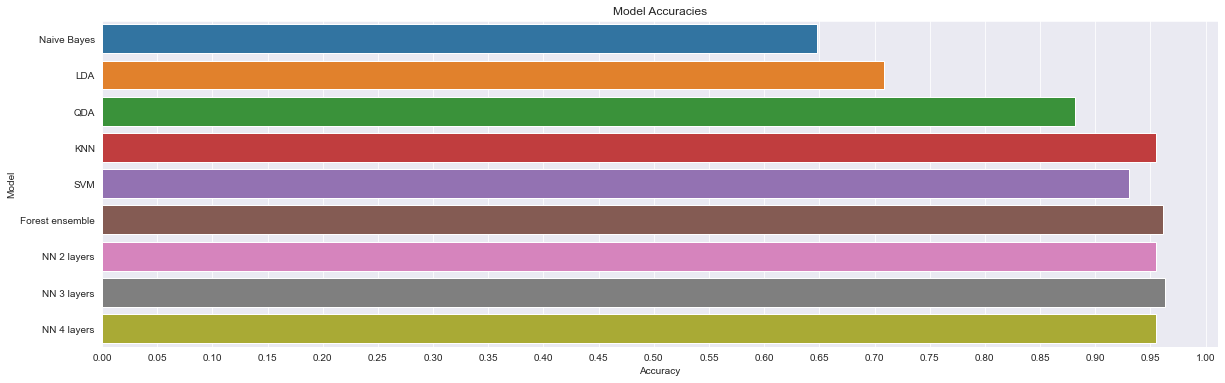

In [209]:
plt.figure(figsize=(20, 6))
names = list(accuracies.keys())
values = list(accuracies.values())
sns.barplot(y=names, x=values)


# Add labels and title
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Model Accuracies')
plt.xticks(np.arange(0, 1.05, 0.05))
# Display the plot
plt.show()

###